In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [157]:
# Load data
df = pd.read_csv("data.csv")

In [158]:
df

,Tarih,Saat,Fiyat_(TL/MWh),PV_Üretim_Tahmini_(MWh)
0,01.05.2025,00:00,1499,0.0
1,01.05.2025,01:00,1575,0.0
2,01.05.2025,02:00,1400,0.0
3,01.05.2025,03:00,1400,0.0
4,01.05.2025,04:00,1400,0.7
...,...,...,...,...
739,31.05.2025,19:00,3390,0.5
740,31.05.2025,20:00,3400,0.0
741,31.05.2025,21:00,3400,0.0
742,31.05.2025,22:00,3080,0.0


In [159]:
# Purpose: Generate summary statistics of the DataFrame and transpose the result

df.describe().T

# Result: Displays descriptive statistics (count, mean, std, min, quartiles, max)
# for each column in the DataFrame in a transposed format (rows = features).

,count,mean,std,min,25%,50%,75%,max
Fiyat_(TL/MWh),744.0,2458.154570,1002.395757,14.0,1799.0,2887.0,3250.0,3400.0
PV_Üretim_Tahmini_(MWh),744.0,1.464247,1.594214,0.0,0.0,0.9,2.6,5.0


In [160]:
# Purpose: Clean and prepare data by renaming columns, merging date and time,
# creating new features, and calculating hourly averages.

# Rename columns
df = df.rename(columns={
    "Fiyat_(TL/MWh)": "Price",
    "PV_Üretim_Tahmini_(MWh)": "PV"
})

# Merge Date and Time columns into a single datetime column
df["Datetime"] = pd.to_datetime(df["Tarih"] + " " + df["Saat"], format="%d.%m.%Y %H:%M")

# Create additional columns
df["Day"] = df["Datetime"].dt.day
df["Hour_num"] = df["Datetime"].dt.hour   # Different name to avoid confusion in visualization

# Calculate average price and PV production by hour
hourly_avg = df.groupby('Saat').agg({
    'Price': 'mean',
    'PV': 'mean'
}).reset_index()

# Result: DataFrame with cleaned columns, datetime column, extra features,
# and hourly averages of Price and PV.

In [161]:
df

,Tarih,Saat,Price,PV,Datetime,Day,Hour_num
0,01.05.2025,00:00,1499,0.0,2025-05-01 00:00:00,1,0
1,01.05.2025,01:00,1575,0.0,2025-05-01 01:00:00,1,1
2,01.05.2025,02:00,1400,0.0,2025-05-01 02:00:00,1,2
3,01.05.2025,03:00,1400,0.0,2025-05-01 03:00:00,1,3
4,01.05.2025,04:00,1400,0.7,2025-05-01 04:00:00,1,4
...,...,...,...,...,...,...,...
739,31.05.2025,19:00,3390,0.5,2025-05-31 19:00:00,31,19
740,31.05.2025,20:00,3400,0.0,2025-05-31 20:00:00,31,20
741,31.05.2025,21:00,3400,0.0,2025-05-31 21:00:00,31,21
742,31.05.2025,22:00,3080,0.0,2025-05-31 22:00:00,31,22


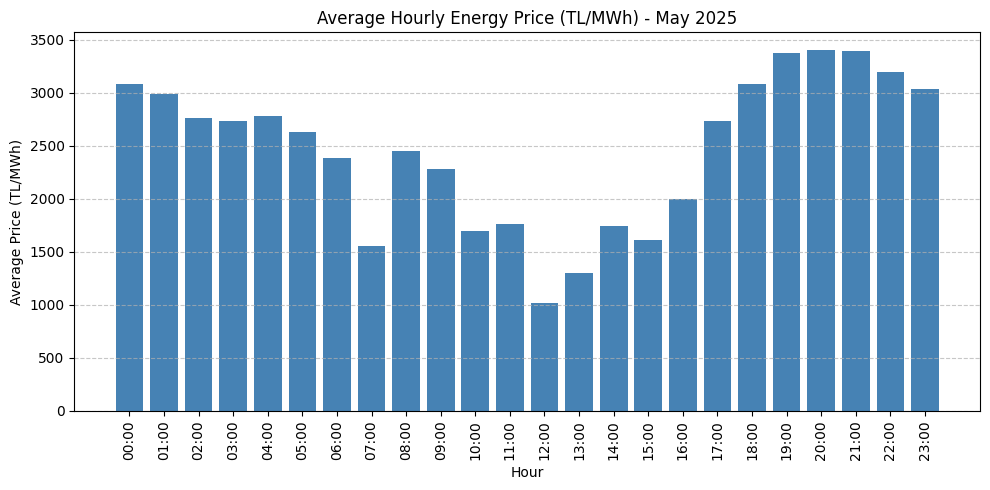

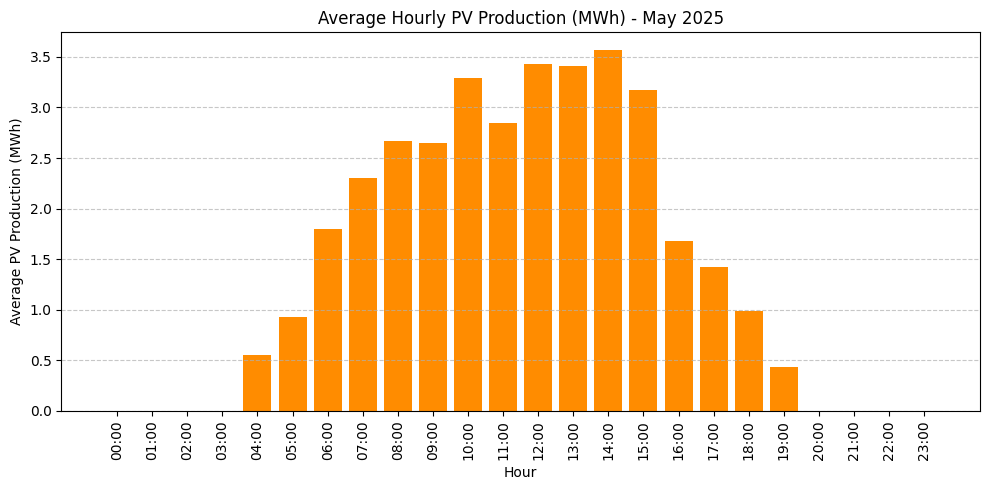

In [162]:
# Purpose: Visualize the average hourly energy price and PV production

# --- Plot 1: Average Hourly Energy Price ---
plt.figure(figsize=(10, 5))
plt.bar(hourly_avg['Saat'], hourly_avg['Price'], color='steelblue')
plt.title('Average Hourly Energy Price (TL/MWh) - May 2025')
plt.xlabel('Hour')
plt.ylabel('Average Price (TL/MWh)')
plt.xticks(range(0, 24), rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- Plot 2: Average Hourly PV Production ---
plt.figure(figsize=(10, 5))
plt.bar(hourly_avg['Saat'], hourly_avg['PV'], color='darkorange')
plt.title('Average Hourly PV Production (MWh) - May 2025')
plt.xlabel('Hour')
plt.ylabel('Average PV Production (MWh)')
plt.xticks(range(0, 24), rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Result: Two bar plots showing average hourly energy prices and average hourly PV production
# throughout May 2025.


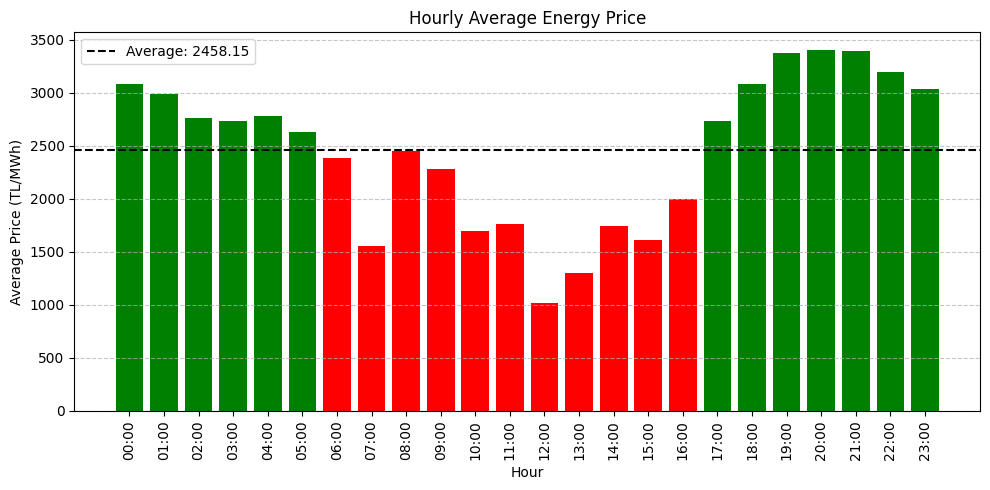

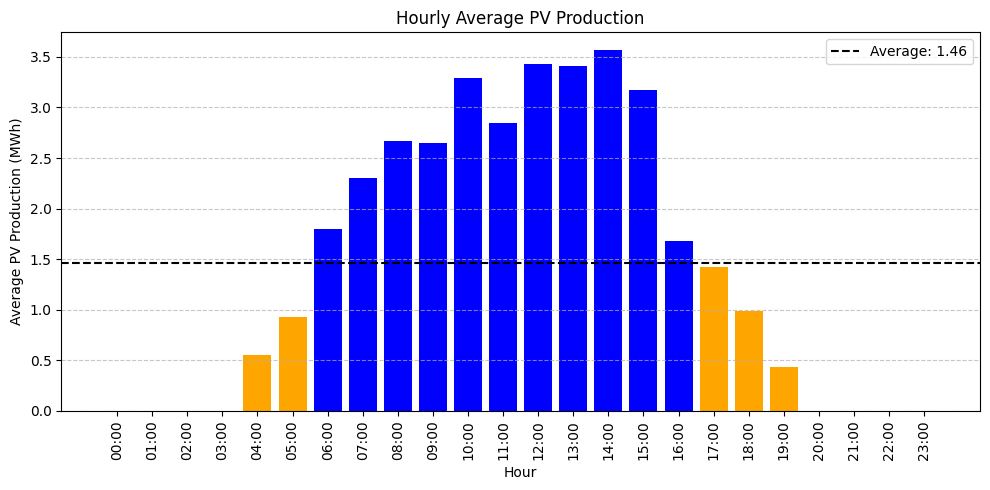

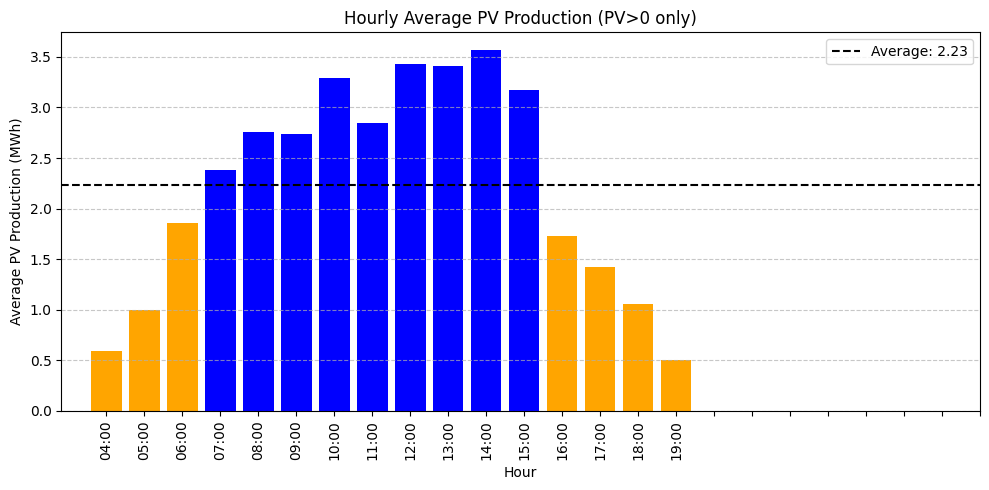

In [163]:
# Purpose: Visualize hourly average energy price and PV production with color-coded bars
# depending on whether values are above or below the overall average.

# Compute overall averages
overall_price_avg = hourly_avg['Price'].mean()
overall_pv_avg = hourly_avg['PV'].mean()

# Assign colors: red if below average, green if above (for price)
price_colors = ['red' if price < overall_price_avg else 'green' for price in hourly_avg['Price']]

# Assign colors: orange if below average, blue if above (for PV production)
pv_colors = ['orange' if pv < overall_pv_avg else 'blue' for pv in hourly_avg['PV']]

# --- Plot 1: Hourly Average Energy Price ---
plt.figure(figsize=(10, 5))
plt.bar(hourly_avg['Saat'], hourly_avg['Price'], color=price_colors)
plt.axhline(overall_price_avg, color='black', linestyle='--', label=f'Average: {overall_price_avg:.2f}')
plt.title('Hourly Average Energy Price')
plt.xlabel('Hour')
plt.ylabel('Average Price (TL/MWh)')
plt.xticks(range(0, 24), rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# --- Plot 2: Hourly Average PV Production ---
plt.figure(figsize=(10, 5))
plt.bar(hourly_avg['Saat'], hourly_avg['PV'], color=pv_colors)
plt.axhline(overall_pv_avg, color='black', linestyle='--', label=f'Average: {overall_pv_avg:.2f}')
plt.title('Hourly Average PV Production')
plt.xlabel('Hour')
plt.ylabel('Average PV Production (MWh)')
plt.xticks(range(0, 24), rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# --- Plot 3: Hourly Average PV Production (PV>0 only) ---
hourly_avg_nonzero = df[df['PV'] > 0].groupby('Saat')['PV'].mean().reset_index()

# Compute overall average excluding zero values
overall_pv_avg_nonzero = hourly_avg_nonzero['PV'].mean()

# Assign colors: blue if above average, orange if below
pv_colors_nonzero = ['blue' if val > overall_pv_avg_nonzero else 'orange'
                     for val in hourly_avg_nonzero['PV']]

plt.figure(figsize=(10, 5))
plt.bar(hourly_avg_nonzero['Saat'], hourly_avg_nonzero['PV'], color=pv_colors_nonzero)
plt.axhline(overall_pv_avg_nonzero, color='black', linestyle='--',
            label=f'Average: {overall_pv_avg_nonzero:.2f}')
plt.title('Hourly Average PV Production (PV>0 only)')
plt.xlabel('Hour')
plt.ylabel('Average PV Production (MWh)')
plt.xticks(range(0, 24), rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# Result: Three bar plots showing:
# 1) Hourly average energy price (colored by above/below average).
# 2) Hourly average PV production (colored by above/below average).
# 3) Hourly average PV production excluding zero values (colored by above/below average).


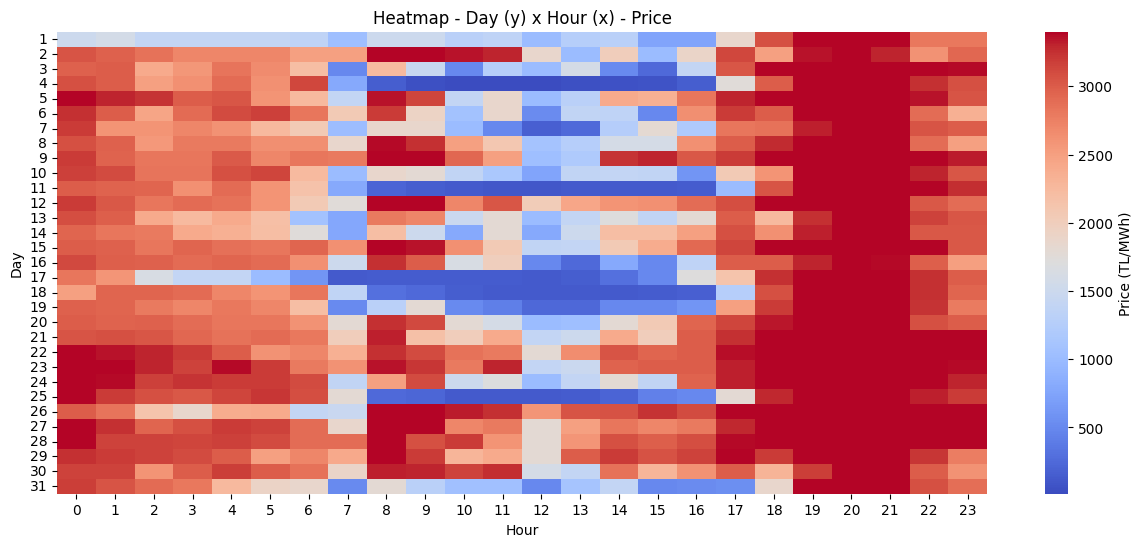

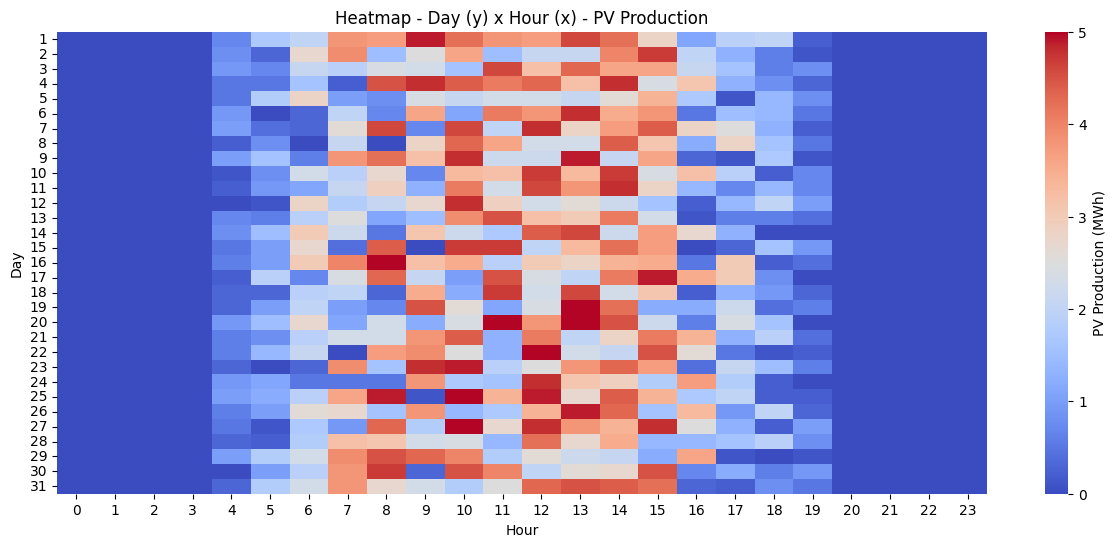

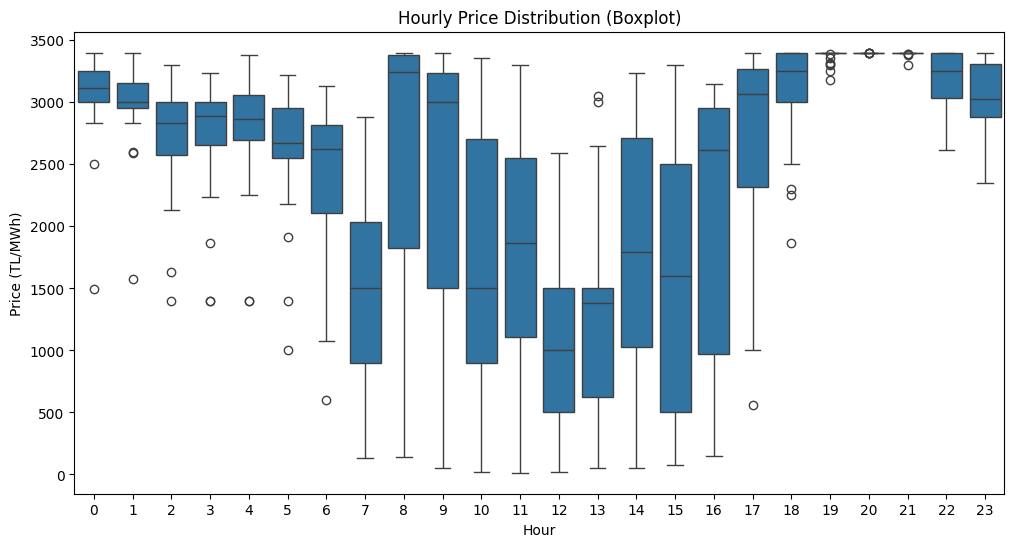

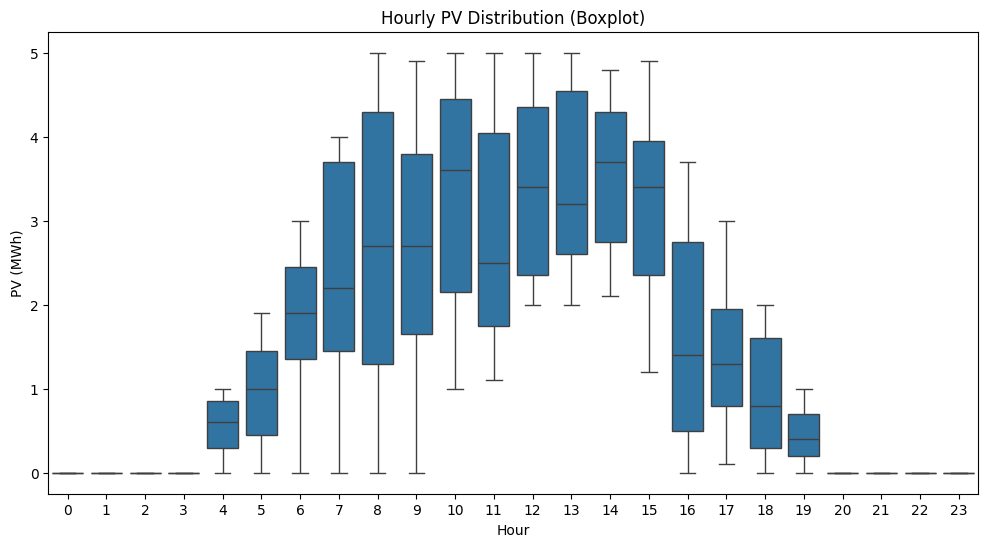

In [164]:
# Purpose: Visualize energy price and PV production patterns using heatmaps and boxplots.

# ---- 1. Heatmap: Day x Hour (Price and PV) ----
pivot_price = df.pivot_table(index="Day", columns="Hour_num", values="Price")
pivot_pv = df.pivot_table(index="Day", columns="Hour_num", values="PV")

plt.figure(figsize=(15, 6))
sns.heatmap(pivot_price, cmap="coolwarm", cbar_kws={'label': 'Price (TL/MWh)'})
plt.title("Heatmap - Day (y) x Hour (x) - Price")
plt.ylabel("Day")
plt.xlabel("Hour")
plt.show()

plt.figure(figsize=(15, 6))
sns.heatmap(pivot_pv, cmap="coolwarm", cbar_kws={'label': 'PV Production (MWh)'})
plt.title("Heatmap - Day (y) x Hour (x) - PV Production")
plt.ylabel("Day")
plt.xlabel("Hour")
plt.show()

# ---- 2. Boxplot: Hourly Price Distribution ----
plt.figure(figsize=(12, 6))
sns.boxplot(x="Hour_num", y="Price", data=df)
plt.title("Hourly Price Distribution (Boxplot)")
plt.xlabel("Hour")
plt.ylabel("Price (TL/MWh)")
plt.show()

# ---- 3. Boxplot: Hourly PV Distribution ----
plt.figure(figsize=(12, 6))
sns.boxplot(x="Hour_num", y="PV", data=df)
plt.title("Hourly PV Distribution (Boxplot)")
plt.xlabel("Hour")
plt.ylabel("PV (MWh)")
plt.show()

# Result:
# 1) Heatmaps showing daily and hourly variations in energy price and PV production.
# 2) Boxplots illustrating the distribution and variability of price and PV across hours.


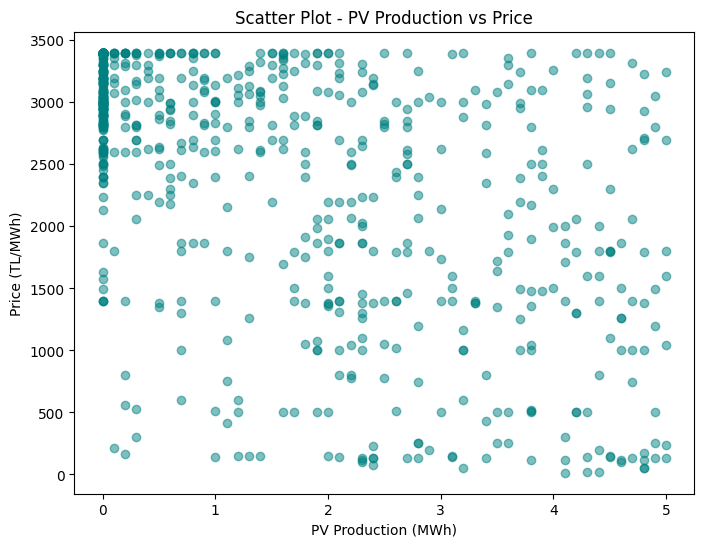

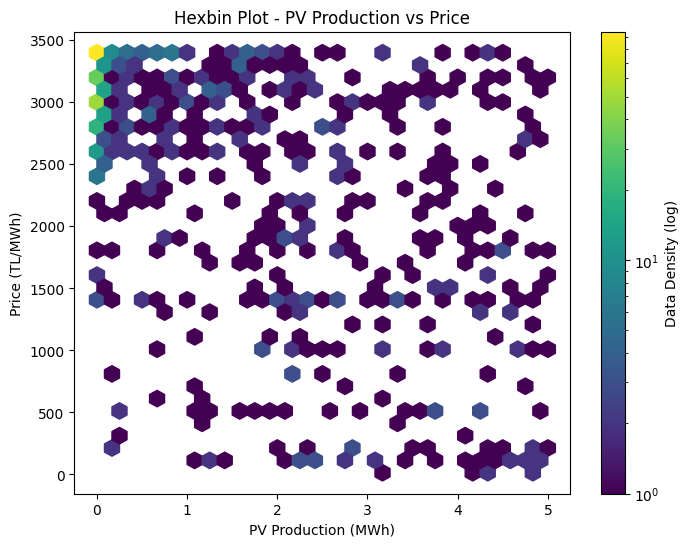

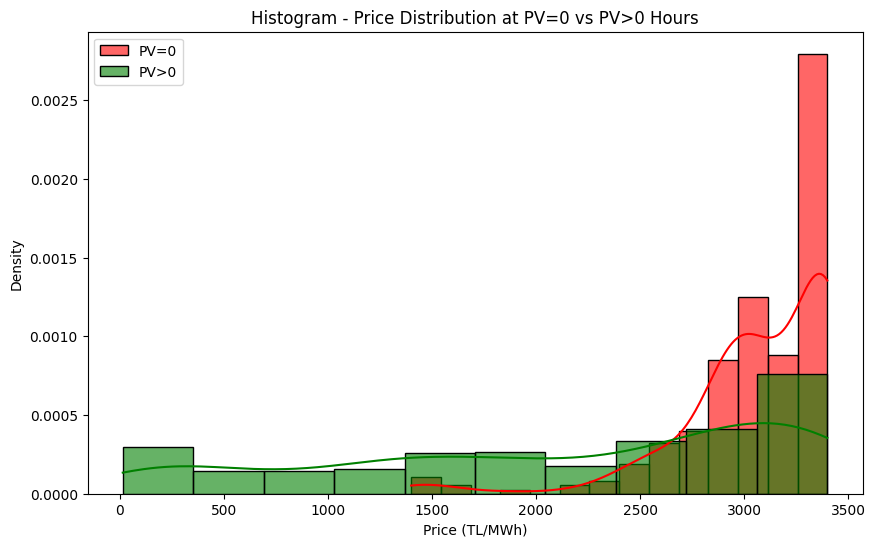

/tmp/ipython-input-3521654283.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="PV_status", y="Price", data=df, palette={"PV=0": "red", "PV>0": "green"})


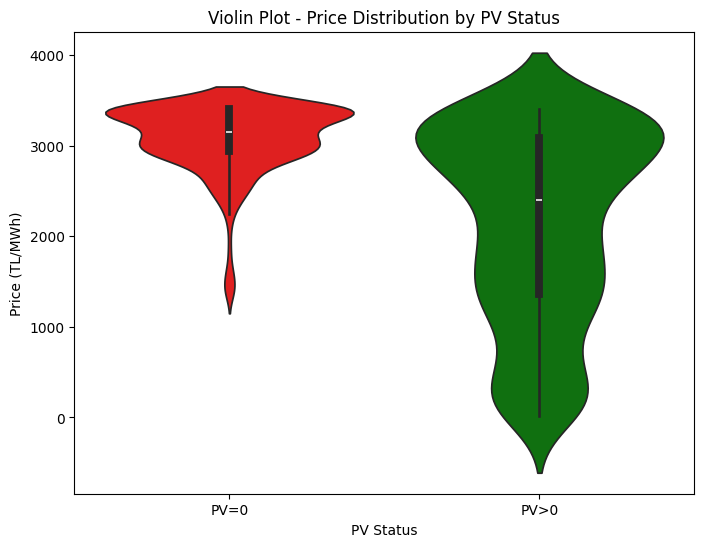

In [165]:
# Purpose: Explore the relationship between PV production and energy price
# using scatter, hexbin, histogram, and violin plots.

# ---- 1. Scatter Plot: PV vs Price ----
plt.figure(figsize=(8, 6))
plt.scatter(df["PV"], df["Price"], alpha=0.5, color="teal")
plt.xlabel("PV Production (MWh)")
plt.ylabel("Price (TL/MWh)")
plt.title("Scatter Plot - PV Production vs Price")
plt.show()

# ---- 2. 2D Density (Hexbin) ----
plt.figure(figsize=(8, 6))
plt.hexbin(df["PV"], df["Price"], gridsize=30, cmap="viridis", bins="log")
plt.colorbar(label="Data Density (log)")
plt.xlabel("PV Production (MWh)")
plt.ylabel("Price (TL/MWh)")
plt.title("Hexbin Plot - PV Production vs Price")
plt.show()

# ---- 3. Histogram: Comparison of PV=0 and PV>0 ----
plt.figure(figsize=(10, 6))
sns.histplot(df[df["PV"] == 0]["Price"], color="red", label="PV=0", kde=True, stat="density", alpha=0.6)
sns.histplot(df[df["PV"] > 0]["Price"], color="green", label="PV>0", kde=True, stat="density", alpha=0.6)
plt.xlabel("Price (TL/MWh)")
plt.ylabel("Density")
plt.title("Histogram - Price Distribution at PV=0 vs PV>0 Hours")
plt.legend()
plt.show()

# ---- 4. Violin Plot: PV=0 vs PV>0 ----
plt.figure(figsize=(8, 6))
df["PV_status"] = df["PV"].apply(lambda x: "PV=0" if x == 0 else "PV>0")
sns.violinplot(x="PV_status", y="Price", data=df, palette={"PV=0": "red", "PV>0": "green"})
plt.xlabel("PV Status")
plt.ylabel("Price (TL/MWh)")
plt.title("Violin Plot - Price Distribution by PV Status")
plt.show()

# Result:
# 1) Scatter and hexbin plots show the relationship and density between PV and Price.
# 2) Histogram compares price distributions for PV=0 vs PV>0.
# 3) Violin plot shows distribution shapes of prices under PV=0 vs PV>0 conditions.


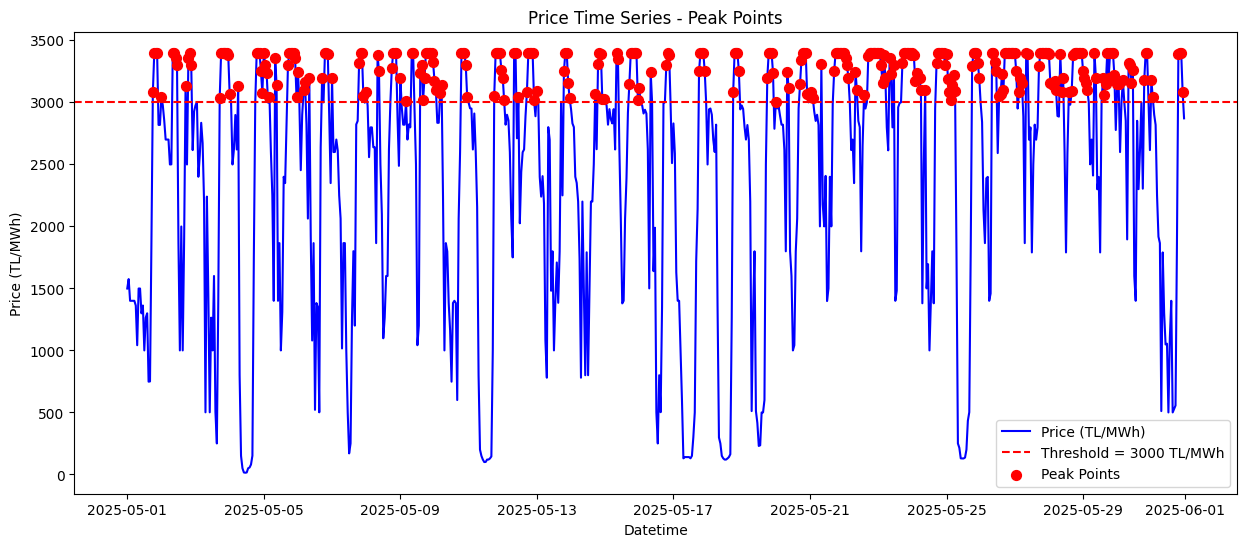

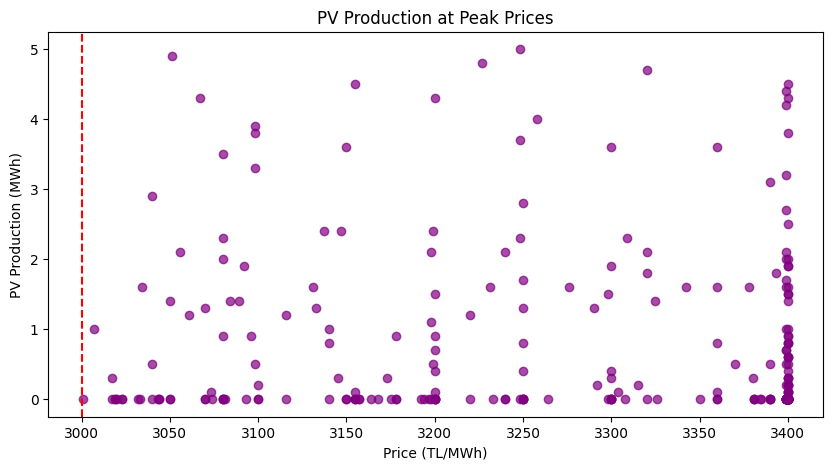

In [166]:
# Purpose: Identify and visualize price peaks above a defined threshold,
# and examine PV production during those peak price periods.

# ---- 1. Define Threshold and Filter Peak Points ----
threshold = 3000
peaks = df[df["Price"] > threshold]

# ---- 2. Price Time Series with Threshold Line ----
plt.figure(figsize=(15, 6))
plt.plot(df["Datetime"], df["Price"], label="Price (TL/MWh)", color="blue")
plt.axhline(y=threshold, color="red", linestyle="--", label=f"Threshold = {threshold} TL/MWh")

# Highlight peak points
plt.scatter(peaks["Datetime"], peaks["Price"], color="red", s=50, zorder=5, label="Peak Points")

plt.title("Price Time Series - Peak Points")
plt.xlabel("Datetime")
plt.ylabel("Price (TL/MWh)")
plt.legend()
plt.show()

# ---- 3. PV Production at Peak Prices ----
plt.figure(figsize=(10, 5))
plt.scatter(peaks["Price"], peaks["PV"], color="purple", alpha=0.7)
plt.axvline(threshold, color="red", linestyle="--")
plt.xlabel("Price (TL/MWh)")
plt.ylabel("PV Production (MWh)")
plt.title("PV Production at Peak Prices")
plt.show()

# Result:
# 1) Time series plot shows price dynamics with threshold line and highlighted peaks.
# 2) Scatter plot shows PV production levels corresponding to peak price periods.


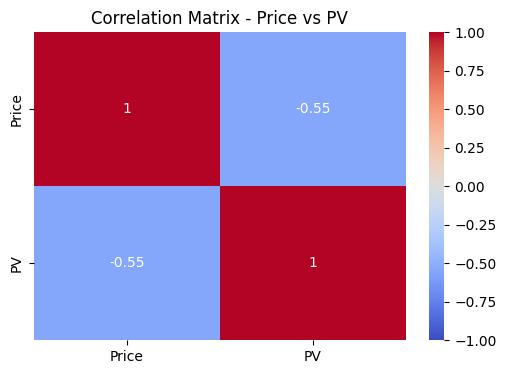

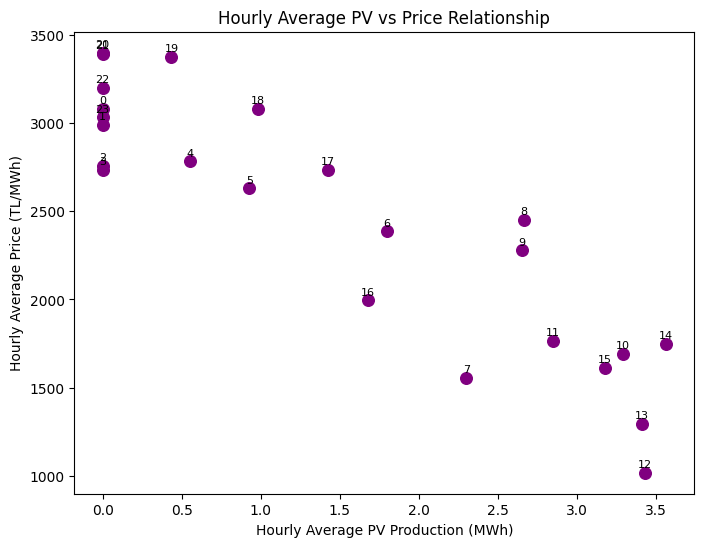

In [167]:
# Purpose: Analyze correlation between Price and PV, and visualize the hourly average relationship.

# ---- 1. Correlation Matrix ----
corr = df[["Price", "PV"]].corr(method="pearson")  # Pearson or Spearman can be used

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, cbar=True)
plt.title("Correlation Matrix - Price vs PV")
plt.show()

# ---- 2. Hourly Average Price vs PV ----
hourly_avg = df.groupby("Hour_num")[["Price", "PV"]].mean().reset_index()

plt.figure(figsize=(8, 6))
plt.scatter(hourly_avg["PV"], hourly_avg["Price"], color="purple", s=70)

# Add hour labels above each point
for _, row in hourly_avg.iterrows():
    plt.text(row["PV"], row["Price"] + 30, str(int(row["Hour_num"])), fontsize=8, ha="center")

plt.xlabel("Hourly Average PV Production (MWh)")
plt.ylabel("Hourly Average Price (TL/MWh)")
plt.title("Hourly Average PV vs Price Relationship")
plt.show()

# Result:
# 1) Heatmap shows correlation strength and direction between Price and PV.
# 2) Scatter plot shows hourly average PV vs Price, annotated with hour numbers.


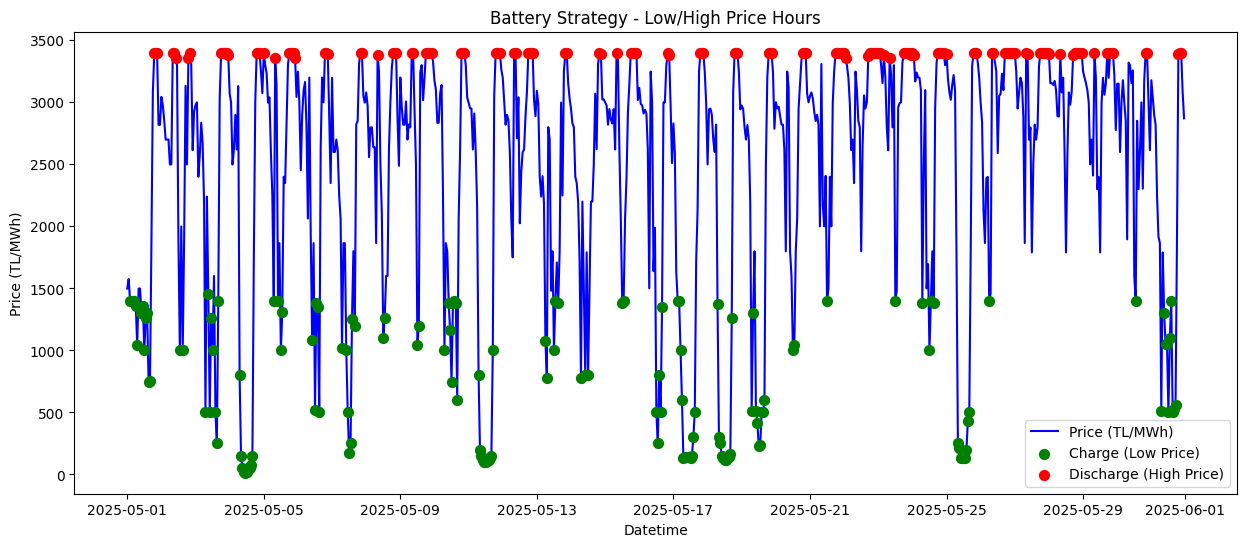

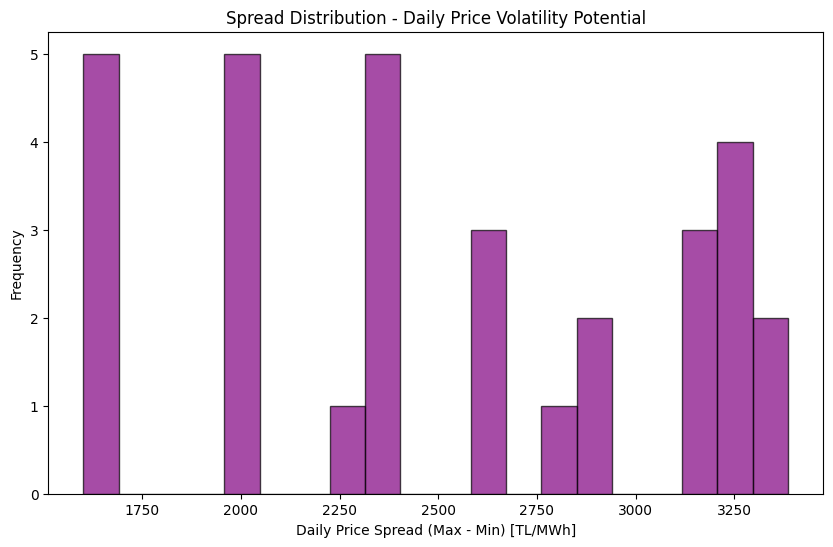

In [168]:
# Purpose: Identify optimal battery charge/discharge hours based on price thresholds
# and visualize daily price spread distribution.

# ---- 1. Determine Charge & Discharge Hours ----
low_threshold = np.percentile(df["Price"], 20)   # lowest 20%
high_threshold = np.percentile(df["Price"], 80)  # highest 20%

low_hours = df[df["Price"] <= low_threshold]
high_hours = df[df["Price"] >= high_threshold]

plt.figure(figsize=(15, 6))
plt.plot(df["Datetime"], df["Price"], label="Price (TL/MWh)", color="blue")
plt.scatter(low_hours["Datetime"], low_hours["Price"], color="green", label="Charge (Low Price)", s=50, zorder=5)
plt.scatter(high_hours["Datetime"], high_hours["Price"], color="red", label="Discharge (High Price)", s=50, zorder=5)
plt.title("Battery Strategy - Low/High Price Hours")
plt.xlabel("Datetime")
plt.ylabel("Price (TL/MWh)")
plt.legend()
plt.show()

# ---- 2. Spread Distribution (High - Low Price Difference) ----
# Daily high-low price differences
daily_spread = df.groupby(df["Datetime"].dt.date)["Price"].agg(lambda x: x.max() - x.min())

plt.figure(figsize=(10, 6))
plt.hist(daily_spread, bins=20, color="purple", alpha=0.7, edgecolor="black")
plt.xlabel("Daily Price Spread (Max - Min) [TL/MWh]")
plt.ylabel("Frequency")
plt.title("Spread Distribution - Daily Price Volatility Potential")
plt.show()

# Result:
# 1) Time series plot shows low and high price hours for potential battery charge/discharge.
# 2) Histogram shows daily price spread distribution, indicating volatility potential.


=== Price Statistics ===
Average Price (TL/MWh): 2458.1545698924733
Maximum Price (TL/MWh): 3400
Minimum Price (TL/MWh): 14
Volatility (Std): 1002.3957568397676

=== PV Production Statistics ===
Average PV Production (MWh): 1.464247311827957
Total PV Production (MWh): 1089.4


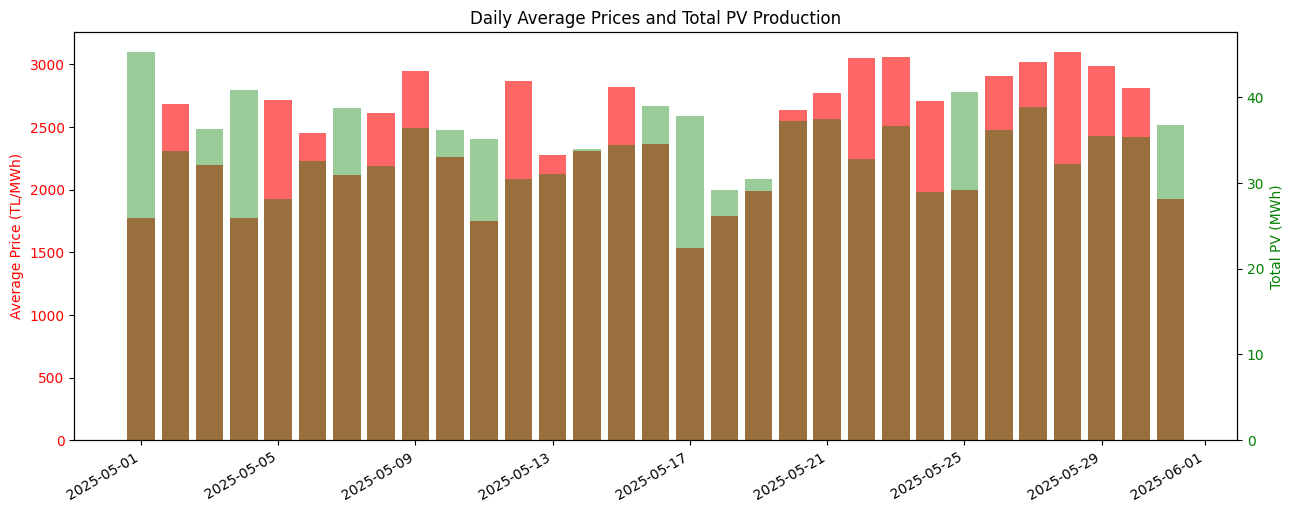

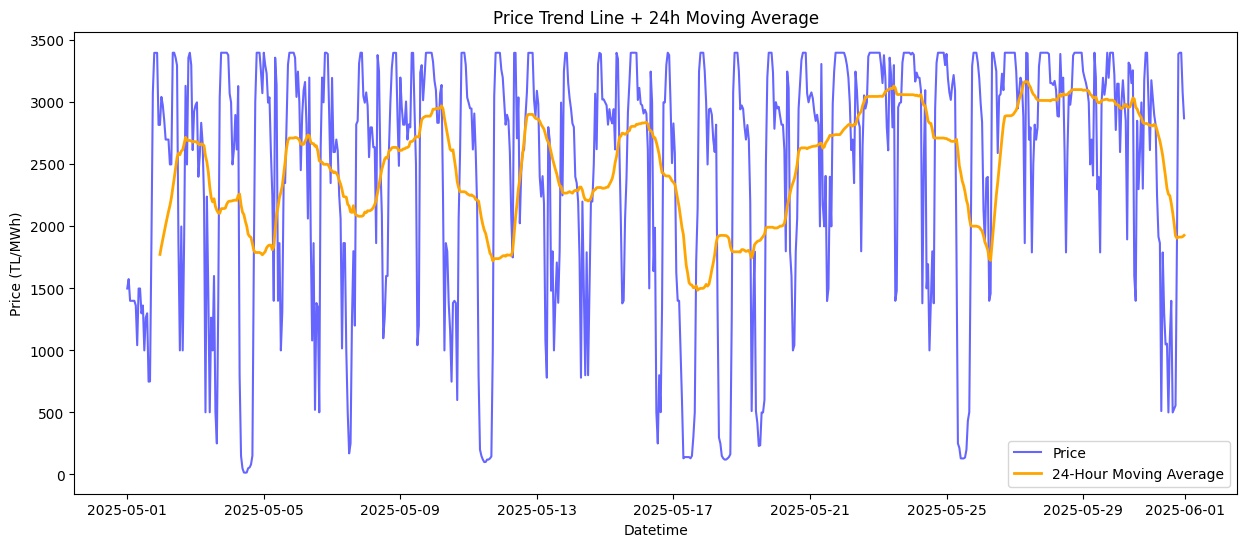

In [169]:
# Purpose: Provide summary statistics, visualize daily averages, and show price trend with moving average.

# ---- 1. Summary Statistics ----
print("=== Price Statistics ===")
print("Average Price (TL/MWh):", df["Price"].mean())
print("Maximum Price (TL/MWh):", df["Price"].max())
print("Minimum Price (TL/MWh):", df["Price"].min())
print("Volatility (Std):", df["Price"].std())

print("\n=== PV Production Statistics ===")
print("Average PV Production (MWh):", df["PV"].mean())
print("Total PV Production (MWh):", df["PV"].sum())

# ---- 2. Daily Bar Chart ----
daily_stats = df.groupby(df["Datetime"].dt.date).agg({
    "Price": "mean",
    "PV": "sum"
}).reset_index()
daily_stats.rename(columns={"Price": "Avg Price", "PV": "Total PV"}, inplace=True)

fig, ax1 = plt.subplots(figsize=(15, 6))

# Bar chart - Average Price
ax1.bar(daily_stats["Datetime"], daily_stats["Avg Price"], color="red", alpha=0.6, label="Average Price (TL/MWh)")
ax1.set_ylabel("Average Price (TL/MWh)", color="red")
ax1.tick_params(axis="y", labelcolor="red")

# Second y-axis - Total PV
ax2 = ax1.twinx()
ax2.bar(daily_stats["Datetime"], daily_stats["Total PV"], color="green", alpha=0.4, label="Total PV (MWh)")
ax2.set_ylabel("Total PV (MWh)", color="green")
ax2.tick_params(axis="y", labelcolor="green")

plt.title("Daily Average Prices and Total PV Production")
fig.autofmt_xdate()
plt.show()

# ---- 3. Trend Line + Moving Average ----
df_sorted = df.sort_values("Datetime").copy()
df_sorted["Price_MA24"] = df_sorted["Price"].rolling(window=24).mean()  # 24-hour moving average

plt.figure(figsize=(15, 6))
plt.plot(df_sorted["Datetime"], df_sorted["Price"], label="Price", color="blue", alpha=0.6)
plt.plot(df_sorted["Datetime"], df_sorted["Price_MA24"], label="24-Hour Moving Average", color="orange", linewidth=2)
plt.xlabel("Datetime")
plt.ylabel("Price (TL/MWh)")
plt.title("Price Trend Line + 24h Moving Average")
plt.legend()
plt.show()

# Result:
# 1) Summary statistics for Price and PV production.
# 2) Daily bar chart showing average price and total PV production.
# 3) Price trend over time with 24-hour moving average to smooth short-term fluctuations.


Average Price (TL/MWh): 2458.1545698924733
Volatility (Std): 1002.3957568397676
5th Percentile: 202.24999999999997
95th Percentile: 3400.0


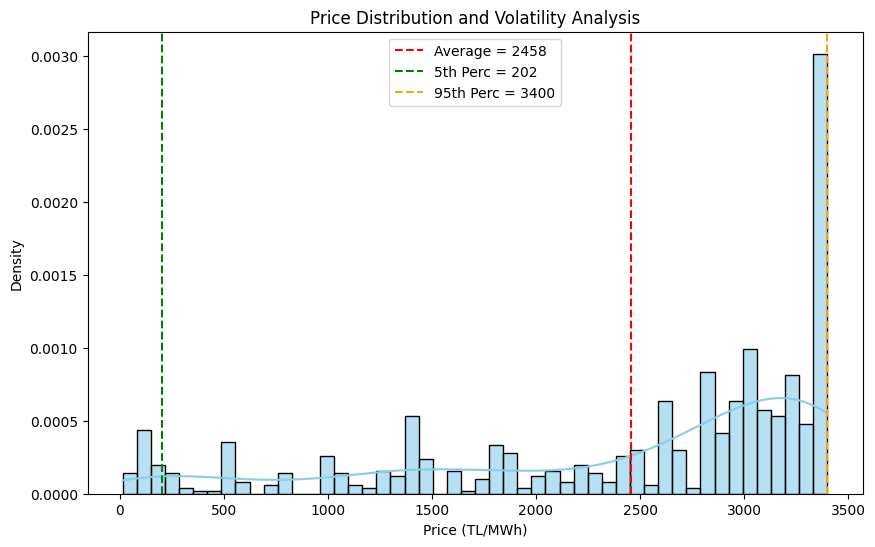

Number of hours with Price > 3000 TL: 297 (39.92%)


In [170]:
# Purpose: Perform basic statistics, visualize price distribution, and analyze extreme price occurrences.

# ---- 1. Basic Statistics ----
avg_price = df["Price"].mean()
std_price = df["Price"].std()
q5 = np.percentile(df["Price"], 5)
q95 = np.percentile(df["Price"], 95)

print("Average Price (TL/MWh):", avg_price)
print("Volatility (Std):", std_price)
print("5th Percentile:", q5)
print("95th Percentile:", q95)

# ---- 2. Histogram + KDE ----
plt.figure(figsize=(10, 6))
sns.histplot(df["Price"], bins=50, kde=True, color="skyblue", stat="density", alpha=0.6)
plt.axvline(avg_price, color="red", linestyle="--", label=f"Average = {avg_price:.0f}")
plt.axvline(q5, color="green", linestyle="--", label=f"5th Perc = {q5:.0f}")
plt.axvline(q95, color="orange", linestyle="--", label=f"95th Perc = {q95:.0f}")
plt.xlabel("Price (TL/MWh)")
plt.ylabel("Density")
plt.title("Price Distribution and Volatility Analysis")
plt.legend()
plt.show()

# ---- 3. Tail Analysis: Prices > 3000 TL ----
peak_count = (df["Price"] > 3000).sum()
peak_ratio = peak_count / len(df) * 100
print(f"Number of hours with Price > 3000 TL: {peak_count} ({peak_ratio:.2f}%)")

# Result:
# 1) Basic statistics including average, volatility, and percentiles.
# 2) Histogram with KDE and percentile markers to visualize price distribution.
# 3) Tail analysis showing frequency and percentage of extreme price hours.


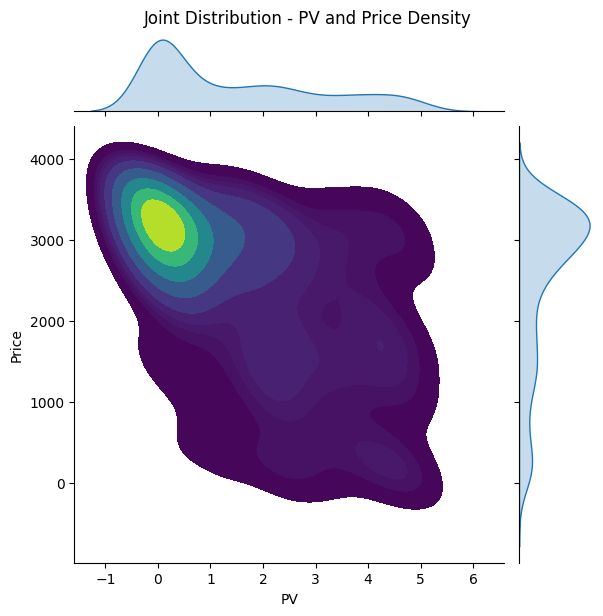

In [171]:
# Purpose: Visualize the joint distribution and density of PV production and Price.

sns.jointplot(x="PV", y="Price", data=df, kind="kde", cmap="viridis", fill=True)
plt.suptitle("Joint Distribution - PV and Price Density", y=1.02)
plt.show()

# Result: Kernel density estimation plot showing areas of high concentration
# for PV production vs. Price, highlighting their joint distribution patterns.


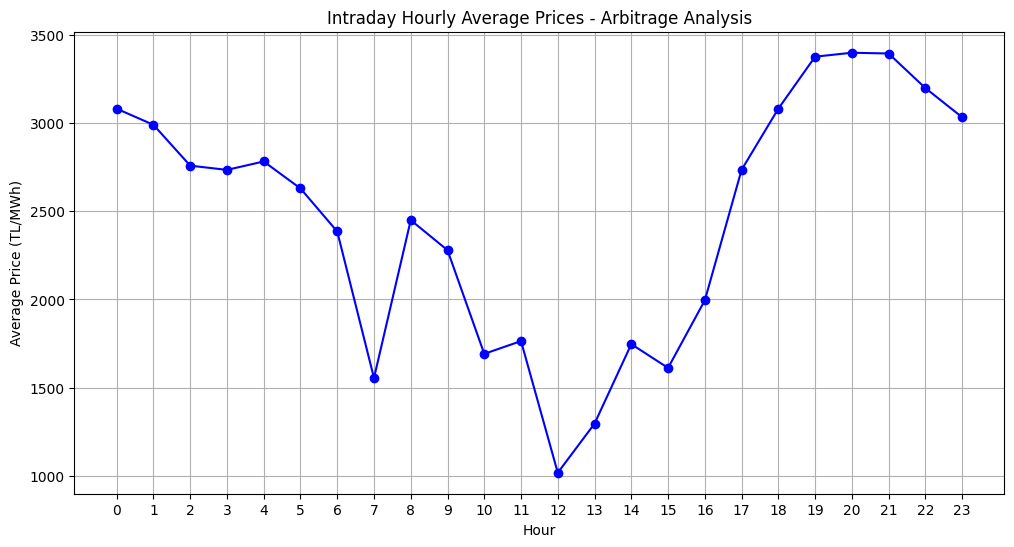

Low price hours (potential charge):
    Hour_num        Price
7          7  1554.548387
10        10  1691.612903
12        12  1017.193548
13        13  1295.612903
15        15  1611.806452

High price hours (potential discharge):
    Hour_num        Price
18        18  3082.387097
19        19  3377.290323
20        20  3399.838710
21        21  3395.387097
22        22  3199.258065


In [172]:
# Purpose: Analyze intraday hourly price transitions to identify potential arbitrage opportunities.

# ---- 1. Hourly Average Price ----
hourly_mean = df.groupby("Hour_num")["Price"].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(hourly_mean["Hour_num"], hourly_mean["Price"], marker='o', color="blue")
plt.xticks(range(0, 24))
plt.xlabel("Hour")
plt.ylabel("Average Price (TL/MWh)")
plt.title("Intraday Hourly Average Prices - Arbitrage Analysis")
plt.grid(True)
plt.show()

# ---- 2. Example: Low (morning) and High (evening) Price Hours ----
low_hours = hourly_mean[hourly_mean["Price"] <= hourly_mean["Price"].quantile(0.2)]
high_hours = hourly_mean[hourly_mean["Price"] >= hourly_mean["Price"].quantile(0.8)]

print("Low price hours (potential charge):")
print(low_hours)

print("\nHigh price hours (potential discharge):")
print(high_hours)

# Result:
# 1) Line plot shows average price for each hour, highlighting daily price patterns.
# 2) Lists of low and high price hours indicate potential battery charge/discharge periods for arbitrage.


/tmp/ipython-input-3966163715.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Week_Type", y="Price", data=df, palette={"Weekday":"skyblue", "Weekend":"orange"})


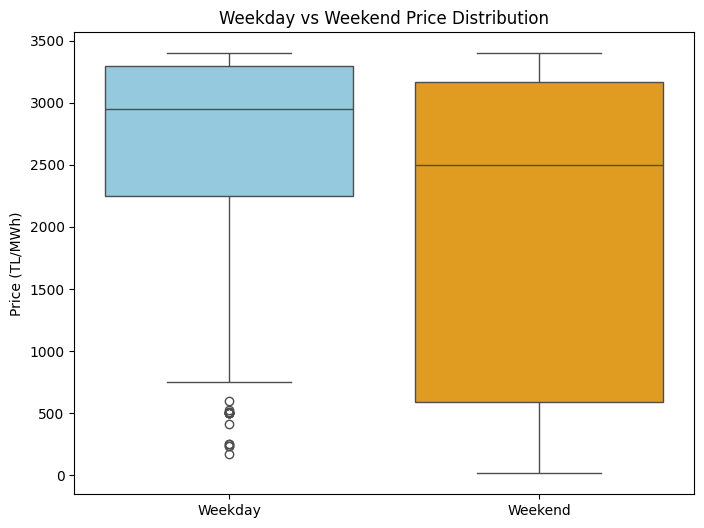

/tmp/ipython-input-3966163715.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Time_of_Day", y="Price", data=df, palette="pastel")


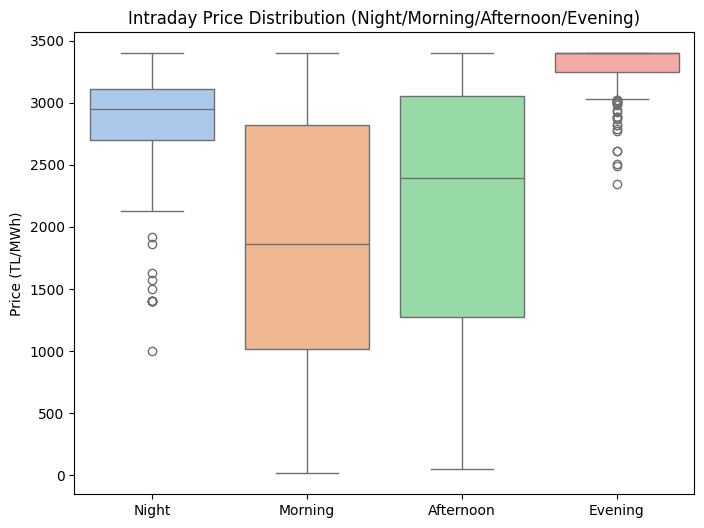

In [176]:
# Purpose: Compare price distributions between weekdays vs weekends and different times of the day.

# ---- 1. Weekday vs Weekend ----
df["Weekday"] = df["Datetime"].dt.dayofweek  # 0=Monday, 6=Sunday
df["Week_Type"] = df["Weekday"].apply(lambda x: "Weekday" if x < 5 else "Weekend")

plt.figure(figsize=(8, 6))
sns.boxplot(x="Week_Type", y="Price", data=df, palette={"Weekday":"skyblue", "Weekend":"orange"})
plt.title("Weekday vs Weekend Price Distribution")
plt.xlabel("")
plt.ylabel("Price (TL/MWh)")
plt.show()

# ---- 2. Daytime/Night Pattern ----
# Example: 0-6 Night, 6-12 Morning, 12-18 Afternoon, 18-23 Evening
def time_of_day(hour):
    if 0 <= hour <= 5:
        return "Night"
    elif 6 <= hour <= 12:
        return "Morning"
    elif 13 <= hour <= 18:
        return "Afternoon"
    else:
        return "Evening"

df["Time_of_Day"] = df["Hour_num"].apply(time_of_day)

plt.figure(figsize=(8, 6))
sns.boxplot(x="Time_of_Day", y="Price", data=df, palette="pastel")
plt.title("Intraday Price Distribution (Night/Morning/Afternoon/Evening)")
plt.xlabel("")
plt.ylabel("Price (TL/MWh)")
plt.show()

# Result:
# 1) Boxplots show differences in price distribution between weekdays and weekends.
# 2) Boxplots show intraday price patterns for different periods of the day.


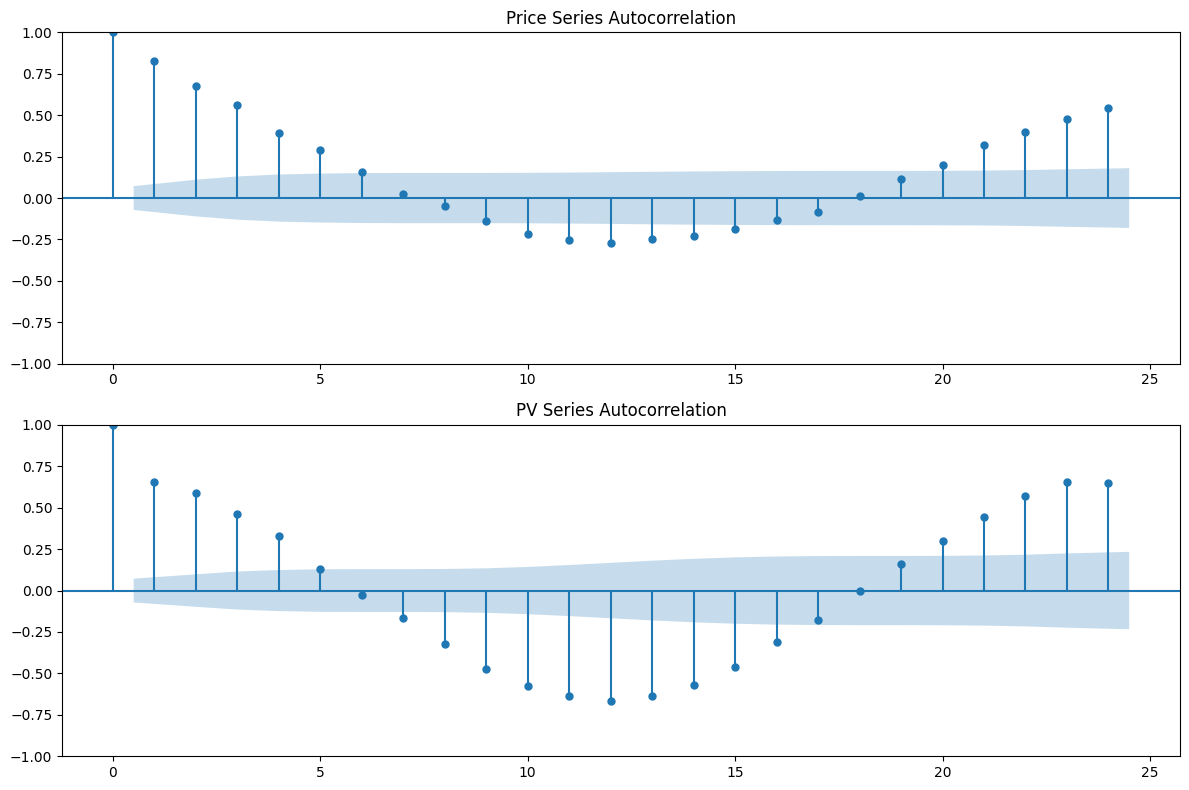

In [174]:
# Purpose: Analyze autocorrelation of Price and PV series to detect temporal dependencies.

from statsmodels.graphics.tsaplots import plot_acf

# ---- Autocorrelation (ACF) for Price and PV ----
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Price series ACF
plot_acf(df["Price"], lags=24, ax=axes[0])
axes[0].set_title("Price Series Autocorrelation")

# PV series ACF
plot_acf(df["PV"], lags=24, ax=axes[1])
axes[1].set_title("PV Series Autocorrelation")

plt.tight_layout()
plt.show()

# Result:
# 1) Autocorrelation plots show correlation of each series with its past lags.
# 2) Useful for identifying repeating patterns or seasonality within 24-hour lags.


In [175]:
# Purpose: Analyze average price and PV production during predefined high and low price hours
# and check the presence of PV production in these periods.

# High and low price hours
high_price_hours = list(range(0, 6)) + list(range(18, 24))  # 00:00–05:00 and 18:00–23:00
low_price_hours = list(range(7, 17))                        # 07:00–16:00

# High price hours: average price and PV production
high_hours_data = df[df["Hour_num"].isin(high_price_hours)]
avg_high_price = high_hours_data["Price"].mean()
avg_high_pv = high_hours_data["PV"].mean()

# Low price hours: average price and PV production
low_hours_data = df[df["Hour_num"].isin(low_price_hours)]
avg_low_price = low_hours_data["Price"].mean()
avg_low_pv = low_hours_data["PV"].mean()

# Overlap check: presence of PV production in high/low price hours
high_pv_nonzero_ratio = (high_hours_data["PV"] > 0).sum() / len(high_hours_data)
low_pv_nonzero_ratio = (low_hours_data["PV"] > 0).sum() / len(low_hours_data)

# ---- Print Results ----
print("=== High Price Hours (00:00-05:00 & 18:00-23:00) ===")
print(f"Average Price: {avg_high_price:.2f} TL/MWh")
print(f"Average PV Production: {avg_high_pv:.2f} MWh")
print(f"PV Production Presence: {high_pv_nonzero_ratio*100:.1f}%\n")

print("=== Low Price Hours (07:00-16:00) ===")
print(f"Average Price: {avg_low_price:.2f} TL/MWh")
print(f"Average PV Production: {avg_low_pv:.2f} MWh")
print(f"PV Production Presence: {low_pv_nonzero_ratio*100:.1f}%")

# Result:
# Provides insight on whether PV production coincides with high or low price periods,
# which is useful for planning battery charge/discharge strategies.


=== High Price Hours (00:00-05:00 & 18:00-23:00) ===
Average Price: 3039.02 TL/MWh
Average PV Production: 0.24 MWh
PV Production Presence: 30.6%

=== Low Price Hours (07:00-16:00) ===
Average Price: 1740.62 TL/MWh
Average PV Production: 2.90 MWh
PV Production Presence: 98.7%
